In [98]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import pickle

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 99)
pd.set_option('display.max_colwidth', None)

### NYC Parking Violations and Results

In [99]:
fp = '/Users/blake/Box/Project/Data/'

In [ ]:
# Load parking violation data
# URL: https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2021/kvfd-bves
fp = '/Users/blake/Box/Project/Data/'
df = pd.read_csv(fp + 'Parking_Violations_Issued_-_Fiscal_Year_2021.csv', low_memory=False)
# data_dict = data_dict.drop(columns=['Unnamed: 3']).dropna()

display(df.head())
display(df.info())

In [ ]:
# Pickle for faster save/load time
df.to_pickle(fp + 'df_Parking_Violations_Issued.pkl')

In [122]:
# Load Pickle
df = pd.read_pickle(fp + 'df_Parking_Violations_Issued.pkl')

In [ ]:
# Change date cols to type datetime
dt_pattern = r'Date|Time'
date_cols = [col for col in df.columns if re.search(dt_pattern, col)]

for col_name in date_cols: 
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

In [ ]:
df.groupby('Registration State').count().sort_values(by='Summons Number', ascending=False)

In [ ]:
df['Summons Number'].nunique()

In [ ]:
# Load parking violation data
# URL: https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89
fp = '/Users/blake/Box/Project/Data/'
df_status = pd.read_csv(fp + 'Open_Parking_and_Camera_Violations.csv', low_memory=False,
                       dtype={'Summons Number': 'str'})

display(df_status.head())
display(df_status.info())

In [ ]:
# Pickle for faster save/load time
df_status.to_pickle(fp + 'df_parking_and_camera_violations_backup.pkl')

In [5]:
# Load Pickled Data
# Parking violations issued in FY 2021
df = pd.read_pickle(fp + 'df_Parking_Violations_Issued.pkl')

# Open parking/camera violations
df_status = pd.read_pickle(fp + 'df_parking_and_camera_violations.pkl')

display(df_status.head())
display(df_status.info())

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image
0,2107978,TX,PAS,7036614365,11/23/2016,09:26A,NO STANDING-BUS STOP,NaN,115.0,10.0,0.0,0.0,125.0,0.0,102.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VG5wQmVrNXFXWGhPUkUweVRsRTlQUT09&locationName=_____________________)
1,EBW7395,NY,PAS,8399013663,01/05/2017,01:36P,CROSSWALK,NaN,115.0,0.0,0.0,0.0,115.0,0.0,62.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSTk5VOVVRWGhOZWxreVRYYzlQUT09&locationName=_____________________)
2,AM491V,NJ,PAS,8075056917,08/26/2016,11:53A,NO STANDING-DAY/TIME LIMITS,NaN,115.0,0.0,0.0,0.0,115.0,0.0,33.0,NY,TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSQk0wNVVRVEZPYW10NFRuYzlQUT09&locationName=_____________________)
3,2380560,IN,PAS,7809134577,09/20/2016,08:00A,DOUBLE PARKING,NaN,115.0,0.0,0.0,115.0,0.0,0.0,6.0,NY,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VG5wbmQwOVVSWHBPUkZVelRuYzlQUT09&locationName=_____________________)
4,GWZ1993,NY,PAS,8075056838,08/26/2016,11:09A,INSP. STICKER-EXPIRED/MISSING,NaN,65.0,30.0,0.0,0.0,95.0,0.0,30.0,NY,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWeb/ShowImage?searchID=VDBSQk0wNVVRVEZPYW1kNlQwRTlQUT09&locationName=_____________________)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810176 entries, 0 to 8810175
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Plate                object 
 1   State                object 
 2   License Type         object 
 3   Summons Number       object 
 4   Issue Date           object 
 5   Violation Time       object 
 6   Violation            object 
 7   Judgment Entry Date  object 
 8   Fine Amount          float64
 9   Penalty Amount       float64
 10  Interest Amount      float64
 11  Reduction Amount     float64
 12  Payment Amount       float64
 13  Amount Due           float64
 14  Precinct             float64
 15  County               object 
 16  Issuing Agency       object 
 17  Violation Status     object 
 18  Summons Image        object 
dtypes: float64(7), object(12)
memory usage: 1.2+ GB


None

In [6]:
df_status['Violation Status'].unique()

array([nan, 'HEARING HELD-GUILTY', 'HEARING HELD-NOT GUILTY',
       'HEARING HELD-GUILTY REDUCTION', 'HEARING PENDING',
       'ADMIN CLAIM GRANTED', 'APPEAL AFFIRMED', 'HEARING ADJOURNMENT',
       'ADMIN REDUCTION', 'APPEAL REVERSED', 'ADMIN CLAIM DENIED',
       'HEARING HELD-REINSTATEMENT', 'APPEAL ABANDONED',
       'APPEAL MODIFIED', 'HEARING WAIVED', 'APPEAL REMANDED'],
      dtype=object)

In [121]:
df.columns.values

NameError: name 'df' is not defined

### Get relevant data for analyzing parking violations

In [8]:
df_slice = df[['Summons Number', 'Plate ID', 'Registration State', 'Vehicle Body Type', 'Vehicle Make', 
               'Vehicle Color', 'Vehicle Year', 'Violation Location', 'Violation Precinct']]
df_status_slice = df_status[['Summons Number', 'Violation', 'Violation Status', 'Fine Amount', 'Penalty Amount',
                     'Reduction Amount', 'Payment Amount', 'Amount Due']]
df_parking_merged = df_slice.merge(df_status_slice, on='Summons Number', how='outer')

In [9]:
# Pickle df_parking_merged
df_parking_merged.to_pickle(fp + 'df_parking_merged.pkl')

In [103]:
# Load df_park_merged
df_parking_merged = pd.read_pickle(fp + 'df_parking_merged.pkl')

In [104]:
# Check correlations
df_parking_merged.corr()

,Vehicle Year,Violation Location,Violation Precinct,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due
Vehicle Year,1.000000,0.072965,-0.213303,-0.247411,0.029490,-0.077552,-0.187215,NaN
Violation Location,0.072965,1.000000,1.000000,-0.043788,NaN,0.004267,-0.037062,NaN
Violation Precinct,-0.213303,1.000000,1.000000,0.384433,-0.073333,0.153678,0.269546,NaN
Fine Amount,-0.247411,-0.043788,0.384433,1.000000,-0.036481,0.216589,0.561918,0.006915
Penalty Amount,0.029490,NaN,-0.073333,-0.036481,1.000000,-0.094798,0.524500,0.000247
Reduction Amount,-0.077552,0.004267,0.153678,0.216589,-0.094798,1.000000,-0.519747,-0.003041
Payment Amount,-0.187215,-0.037062,0.269546,0.561918,0.524500,-0.519747,1.000000,-0.013503
Amount Due,NaN,NaN,NaN,0.006915,0.000247,-0.003041,-0.013503,1.000000


In [10]:
df_parking_merged.describe()

,Vehicle Year,Violation Location,Violation Precinct,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due
count,5.398815e+06,3.305367e+06,5.398815e+06,8.179068e+06,8.179068e+06,8.179068e+06,8.179068e+06,8.179068e+06
mean,1.600068e+03,5.538381e+01,3.390815e+01,7.068652e+01,1.157318e+01,1.066075e+01,7.235903e+01,7.557096e-03
std,8.135871e+02,3.808878e+01,4.020459e+01,3.079833e+01,1.957692e+01,2.718391e+01,4.325966e+01,8.998671e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.004000e+03,1.900000e+01,0.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,4.500000e+01,0.000000e+00
50%,2.013000e+03,4.900000e+01,1.400000e+01,6.500000e+01,0.000000e+00,0.000000e+00,6.500000e+01,0.000000e+00
75%,2.018000e+03,9.000000e+01,6.700000e+01,1.150000e+02,1.000000e+01,1.300000e-01,1.077500e+02,0.000000e+00
max,2.069000e+03,9.040000e+02,9.040000e+02,5.150000e+02,6.000000e+01,7.184700e+02,7.106400e+02,2.090000e+02


In [ ]:
# violation status based on vehicle year, other vars?
df_parking_merged['Vehicle Year'].describe() #.str.contains('gray', case=False).count()

In [ ]:
# Look at vehicle year
df_vehicle_yr = df_parking_merged.loc[(df_parking_merged['Vehicle Year'] != 0) & 
                                      (df_parking_merged['Vehicle Year'] < 2023)].groupby('Vehicle Year').count()

In [ ]:
df_vehicle_yr.index.values

In [ ]:
df_vehicle_yr.reset_index().plot.scatter(x='Vehicle Year', y='Summons Number')

In [106]:
# Analyze based on Violation Status
df_violation_status = df_parking_merged.loc[(df_parking_merged['Violation Status'] != 'HEARING PENDING') & 
                                            (df_parking_merged['Violation Status'] != np.nan)]

In [12]:
df_violation_status.groupby('Violation Status').count()

,Summons Number,Plate ID,Registration State,Vehicle Body Type,Vehicle Make,Vehicle Color,Vehicle Year,Violation Location,Violation Precinct,Violation,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due
Violation Status,,,,,,,,,,,,,,,
ADMIN CLAIM DENIED,3012,0,0,0,0,0,0,0,0,3012,3012,3012,3012,3012,3012
ADMIN CLAIM GRANTED,69563,1,1,1,1,1,1,0,1,69560,69563,69563,69563,69563,69563
ADMIN REDUCTION,15281,1,1,1,1,0,1,0,1,15279,15281,15281,15281,15281,15281
APPEAL ABANDONED,965,0,0,0,0,0,0,0,0,965,965,965,965,965,965
APPEAL AFFIRMED,13031,0,0,0,0,0,0,0,0,13031,13031,13031,13031,13031,13031
APPEAL MODIFIED,92,0,0,0,0,0,0,0,0,92,92,92,92,92,92
APPEAL REMANDED,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1
APPEAL REVERSED,4189,2,2,2,2,2,2,1,2,4189,4189,4189,4189,4189,4189
HEARING ADJOURNMENT,18091,7,7,7,7,7,7,1,7,18091,18091,18091,18091,18091,18091


In [107]:
denied_cols = ['ADMIN CLAIM DENIED', 'APPEAL AFFIRMED', 'HEARING HELD-GUILTY']
reduced_cols = ['ADMIN REDUCTION', 'HEARING HELD-GUILTY REDUCTION']
granted_cols = ['ADMIN CLAIM GRANTED', 'APPEAL REVERSED', 'HEARING HELD-NOT GUILTY']

In [109]:
df_violation_status['Coded Violation Status'] = np.where(
    df_violation_status['Violation Status'].isin(denied_cols), 'Denied', np.where(
    df_violation_status['Violation Status'].isin(reduced_cols), 'Reduced', np.where(
    df_violation_status['Violation Status'].isin(granted_cols), 'Granted', 'Other')))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
df_violation_status['Coded Violation Status Number'] = df_violation_status['Coded Violation Status'].map(
    {'Denied': 0, 'Reduced': 1, 'Granted': 2, 'Other': np.nan})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
df_violation_status.corr()

,Vehicle Year,Violation Location,Violation Precinct,Fine Amount,Penalty Amount,Reduction Amount,Payment Amount,Amount Due,Coded Violation Status Number
Vehicle Year,1.000000,0.072965,-0.213303,-0.247411,0.029490,-0.077552,-0.187215,NaN,-0.130429
Violation Location,0.072965,1.000000,1.000000,-0.043788,NaN,0.004267,-0.037062,NaN,0.032325
Violation Precinct,-0.213303,1.000000,1.000000,0.384433,-0.073333,0.153678,0.269546,NaN,0.240720
Fine Amount,-0.247411,-0.043788,0.384433,1.000000,-0.037602,0.217842,0.557922,0.006535,-0.146391
Penalty Amount,0.029490,NaN,-0.073333,-0.037602,1.000000,-0.098573,0.526820,0.000660,-0.191875
Reduction Amount,-0.077552,0.004267,0.153678,0.217842,-0.098573,1.000000,-0.522760,-0.002912,0.788005
Payment Amount,-0.187215,-0.037062,0.269546,0.557922,0.526820,-0.522760,1.000000,-0.012828,-0.796510
Amount Due,NaN,NaN,NaN,0.006535,0.000660,-0.002912,-0.012828,1.000000,-0.002104
Coded Violation Status Number,-0.130429,0.032325,0.240720,-0.146391,-0.191875,0.788005,-0.796510,-0.002104,1.000000


In [113]:
df_violation_status['Violation Precinct'].unique()

array([100., 101., 102., 105.,  46.,  43.,  40.,   0.,  48.,  50.,  44.,
        19.,  24.,  25.,  20.,  28.,  30.,  23.,  33., 113., 107., 106.,
       103.,  32.,  34.,  26.,  18.,  10.,  73.,  84.,  81.,  75.,   7.,
        79.,  77.,  94.,  83.,  90.,  17.,  13.,  35.,   1.,   5., 114.,
       104.,  14.,  52., 115., 122., 120., 123., 108.,  41.,  88., 109.,
       110., 112., 111.,  42.,  45.,  49.,   9.,   6.,  60.,  63., 121.,
       163.,  47.,  70.,  72.,  67.,  61.,  62.,  71.,  68.,  66.,  78.,
        76.,  69.,  15.,  39.,  58., 117., 118.,  74.,  57.,  95., 904.,
        22., 119.,   2.,  16.,  92.,   8.,  12.,  64.,  11.,  89.,  38.,
        65.,  96.,  55.,  27., 174.,   4.,  93., 260.,  97.,  56., 401.,
        54.,  21.,  80.,  98., 126.,  37.,  99.,  87., 116.,  82., 140.,
         3.,  31., 803., 807., 136.,  29., 161., 127.,  53.,  91.,  86.,
        85., 601., 805., 804., 144., 806., 801., 180., 162.,  36., 808.,
       183.,  nan])

In [111]:
df_violation_status['Coded Violation Status'].value_counts()

Other      11666859
Granted      843622
Denied       821225
Reduced      753799
Name: Coded Violation Status, dtype: int64

In [17]:
df_violation_status_dropped = df_violation_status.dropna(subset=['Violation Status'])
df_violation_status_dropped['Coded Violation Status'].value_counts()

Granted    843622
Denied     821225
Reduced    753799
Other       21041
Name: Coded Violation Status, dtype: int64

In [18]:
# Pickle for faster save/load time
df_violation_status_dropped.to_pickle(fp + 'df_violation_status_dropped.pkl')

In [3]:
# Load pickled df
df_violation_status_dropped = pd.read_pickle(fp + 'df_violation_status_dropped.pkl')

In [4]:
df_violation_status_dropped.columns.values

array(['Summons Number', 'Plate ID', 'Registration State',
       'Vehicle Body Type', 'Vehicle Make', 'Vehicle Color',
       'Vehicle Year', 'Violation Location', 'Violation Precinct',
       'Violation', 'Violation Status', 'Fine Amount', 'Penalty Amount',
       'Reduction Amount', 'Payment Amount', 'Amount Due',
       'Coded Violation Status'], dtype=object)

In [19]:
cols = ['Coded Violation Status', 'Fine Amount', 'Penalty Amount',
       'Reduction Amount', 'Payment Amount', 'Amount Due']
df_violation_status_dropped[cols].groupby('Coded Violation Status').describe()

Fine Amount                                                        Penalty Amount                                                   Reduction Amount                                                        Payment Amount                                                          Amount Due                                                
                             count       mean        std   min   25%    50%    75%    max          count       mean        std  min  25%   50%   75%   max            count       mean        std  min   25%   50%     75%     max          count        mean        std  min   25%    50%     75%     max      count      mean       std  min  25%  50%  75%     max
Coded Violation Status                                                                                                                                                                                                                                                                                                                                               
Denied                    821225.0  83.638585  31.100303   0.0  65.0   65.0  115.0  515.0       821225.0  12.519687  21.154155  0.0  0.0   0.0  10.0  60.0         821225.0   0.565047   5.595157  0.0   0.0   0.0    0.00  715.20       821225.0   96.418009  36.928566  0.0  65.0  115.0  115.00  689.05   821225.0  0.001440  0.464859  0.0  0.0  0.0  0.0  209.00
Granted                   843622.0  72.115022  35.247368   0.0  35.0   65.0  115.0  515.0       843622.0   5.101035  12.140624  0.0  0.0   0.0  10.0  60.0         843622.0  77.274032  36.750008  0.0  45.0  65.0  115.00  691.68       843622.0    0.000077   0.070768  0.0   0.0    0.0    0.00   65.00   843622.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.00
Other                      21041.0  92.131315  81.884499  35.0  50.0   65.0  115.0  515.0        21041.0  20.557245  23.974540  0.0  0.0  10.0  30.0  60.0          21041.0   1.421078   9.691088  0.0   0.0   0.0    0.04  284.06        21041.0  114.656667  86.882199  0.0  65.0   95.0  125.28  653.66    21041.0  0.013568  1.212558  0.0  0.0  0.0  0.0  145.00
Reduced                   753799.0  90.970759  29.147563  25.0  65.0  115.0  115.0  515.0       753799.0   2.309064  10.084948  0.0  0.0   0.0   0.0  60.0         753799.0  24.932755  17.574402  0.0  15.0  23.0   33.00  409.95       753799.0   68.729448  34.531708  0.0  30.0   82.0  100.00  525.00   753799.0  0.000268  0.148259  0.0  0.0  0.0  0.0  116.11

In [20]:
# What types of violations are more likely to be reduced?
# df_violation_status_dropped['Violation'].unique()
df_violation_status_dropped_slice = df_violation_status_dropped.loc[df_violation_status_dropped['Coded Violation Status'] == 'Denied']
df_violation_status_dropped.groupby(['Violation', 'Coded Violation Status']).count()

Summons Number  Plate ID  Registration State  Vehicle Body Type  Vehicle Make  Vehicle Color  Vehicle Year  Violation Location  Violation Precinct  Violation Status  Fine Amount  Penalty Amount  Reduction Amount  Payment Amount  Amount Due
Violation                     Coded Violation Status                                                                                                                                                                                                                                                 
ALTERING INTERCITY BUS PERMIT Denied                               1         0                   0                  0             0              0             0                   0                   0                 1            1               1                 1               1           1
                              Granted                             23         0                   0                  0             0              0             0                   0                   0                23           23              23                23              23          23
                              Reduced                              3         0                   0                  0             0              0             0                   0                   0                 3            3               3                 3               3           3
ANGLE PARKING                 Denied                             794         0                   0                  0             0              0             0                   0                   0               794          794             794               794             794         794
                              Granted                            458         0                   0                  0             0              0             0                   0                   0               458          458             458               458             458         458
...                                                              ...       ...                 ...                ...           ...            ...           ...                 ...                 ...               ...          ...             ...               ...             ...         ...
WASH/REPAIR VEHCL-REPAIR ONLY Granted                              5         0                   0                  0             0              0             0                   0                   0                 5            5               5                 5               5           5
WRONG WAY                     Denied                             992         0                   0                  0             0              0             0                   0                   0               992          992             992               992             992         992
                              Granted                            591         0                   0                  0             0              0             0                   0                   0               591          591             591               591             591         591
                              Other                               18         0                   0                  0             0              0             0                   0                   0                18           18              18                18              18          18
                              Reduced                            907         0                   0                  0             0              0             0                   0                   0               907          907             907               907             907         907

[343 rows x 15 columns]

In [6]:
df_violation_status_dropped_trimmed = df_violation_status_dropped[['Violation', 'Coded Violation Status', 'Summons Number']]
groupby_cols = ['Violation', 'Coded Violation Status']
df_violation_grouped = df_violation_status_dropped_trimmed.groupby(groupby_cols).count()

In [16]:
df_violation_grouped.index.get_level_values(0)

Index(['ALTERING INTERCITY BUS PERMIT', 'ALTERING INTERCITY BUS PERMIT', 'ALTERING INTERCITY BUS PERMIT', 'ANGLE PARKING', 'ANGLE PARKING', 'ANGLE PARKING', 'ANGLE PARKING', 'ANGLE PARKING-COMM VEHICLE', 'ANGLE PARKING-COMM VEHICLE', 'ANGLE PARKING-COMM VEHICLE',
       ...
       'VEHICLE FOR SALE(DEALERS ONLY)', 'VIN OBSCURED', 'VIN OBSCURED', 'VIN OBSCURED', 'WASH/REPAIR VEHCL-REPAIR ONLY', 'WASH/REPAIR VEHCL-REPAIR ONLY', 'WRONG WAY', 'WRONG WAY', 'WRONG WAY', 'WRONG WAY'], dtype='object', name='Violation', length=343)

In [ ]:
df_violation_grouped['Violation']

In [62]:
df_violation_grouped.info()`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Violation               343 non-null    object 
 1   Coded Violation Status  343 non-null    object 
 2   Summons Number          343 non-null    int64  
 3   Pct                     343 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.8+ KB


In [63]:
def add_pct_col(df):
    df = df.reset_index()
    df['Pct'] = round(df['Summons Number'] / df.groupby('Violation')['Summons Number'].transform('sum') * 100, 2)
    return df

df_violation_grouped = df_violation_grouped.loc[df_violation_grouped['Summons Number'] >= 20]
df_violation_grouped = add_pct_col(df_violation_grouped)
display(df_violation_grouped.sort_values(by=['Violation', 'Pct'], ascending=False).head(99))

,index,Violation,Coded Violation Status,Summons Number,Pct
249,339,WRONG WAY,Denied,992,39.84
251,342,WRONG WAY,Reduced,907,36.43
250,340,WRONG WAY,Granted,591,23.73
248,331,VEHICLE FOR SALE(DEALERS ONLY),Granted,80,100.00
247,324,UNAUTHORIZED PASSENGER PICK-UP,Granted,256,76.42
246,323,UNAUTHORIZED PASSENGER PICK-UP,Denied,79,23.58
243,320,UNAUTHORIZED BUS LAYOVER,Granted,2337,65.22
242,319,UNAUTHORIZED BUS LAYOVER,Denied,1137,31.73
245,322,UNAUTHORIZED BUS LAYOVER,Reduced,89,2.48
244,321,UNAUTHORIZED BUS LAYOVER,Other,20,0.56


In [123]:
# Look at specific violation
violation = 'PHTO SCHOOL ZN SPEED VIOLATION'
df_violation_grouped.loc[df_violation_grouped['Violation'] == violation]

,index,Violation,Coded Violation Status,Summons Number,Pct
205,267,PHTO SCHOOL ZN SPEED VIOLATION,Denied,17939,54.82
206,268,PHTO SCHOOL ZN SPEED VIOLATION,Granted,2381,7.28
207,269,PHTO SCHOOL ZN SPEED VIOLATION,Other,2132,6.52
208,270,PHTO SCHOOL ZN SPEED VIOLATION,Reduced,10271,31.39


In [37]:
# Most 
coded_violation_status_list = list(set(df_violation_grouped['Coded Violation Status'].unique()))
for status in coded_violation_status_list:
    print(status)
    display(df_violation_grouped.loc[df_violation_grouped['Coded Violation Status'] == status].sort_values(
        by='Pct', ascending=False).head())
    print('\n')

Denied


,Violation,Coded Violation Status,Summons Number,Pct
38,DIVIDED HIGHWAY,Denied,72,72.73
112,INSP. STICKER-EXPIRED/MISSING,Denied,60532,70.80
285,REG. STICKER-EXPIRED/MISSING,Denied,50988,70.70
18,BUS LANE VIOLATION,Denied,11290,63.83
7,ANGLE PARKING-COMM VEHICLE,Denied,49,62.82




Other


,Violation,Coded Violation Status,Summons Number,Pct
242,OT PARKING-MISSING/BROKEN METR,Other,1,6.67
269,PHTO SCHOOL ZN SPEED VIOLATION,Other,2132,6.52
86,FAILURE TO STOP AT RED LIGHT,Other,925,5.09
51,ELEVATED/DIVIDED HIGHWAY/TUNNL,Other,1,4.35
318,UNALTERED COMM VEHICLE,Other,3,3.85




Reduced


,Violation,Coded Violation Status,Summons Number,Pct
212,NO STANDING-SNOW EMERGENCY,Reduced,60,76.92
273,PKG IN EXC. OF LIM-COMM MTR ZN,Reduced,16,72.73
60,EXPIRED METER,Reduced,330,65.74
17,BIKE LANE,Reduced,25916,59.43
76,FAIL TO DISP. MUNI METER RECPT,Reduced,88269,58.03




Granted


,Violation,Coded Violation Status,Summons Number,Pct
289,REMOVE/REPLACE FLAT TIRE,Granted,4,100.00
123,MISCELLANEOUS,Granted,2,100.00
120,MARGINAL STREET/WATER FRONT,Granted,1,100.00
249,OVERNIGHT TRACTOR TRAILER PKG,Granted,182,91.46
82,FAILURE TO DISPLAY BUS PERMIT,Granted,366,90.37


In [69]:
granted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 250
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   76 non-null     int64  
 1   Violation               76 non-null     object 
 2   Coded Violation Status  76 non-null     object 
 3   Summons Number          76 non-null     int64  
 4   Pct                     76 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


<AxesSubplot:xlabel='Violation', ylabel='Summons Number'>

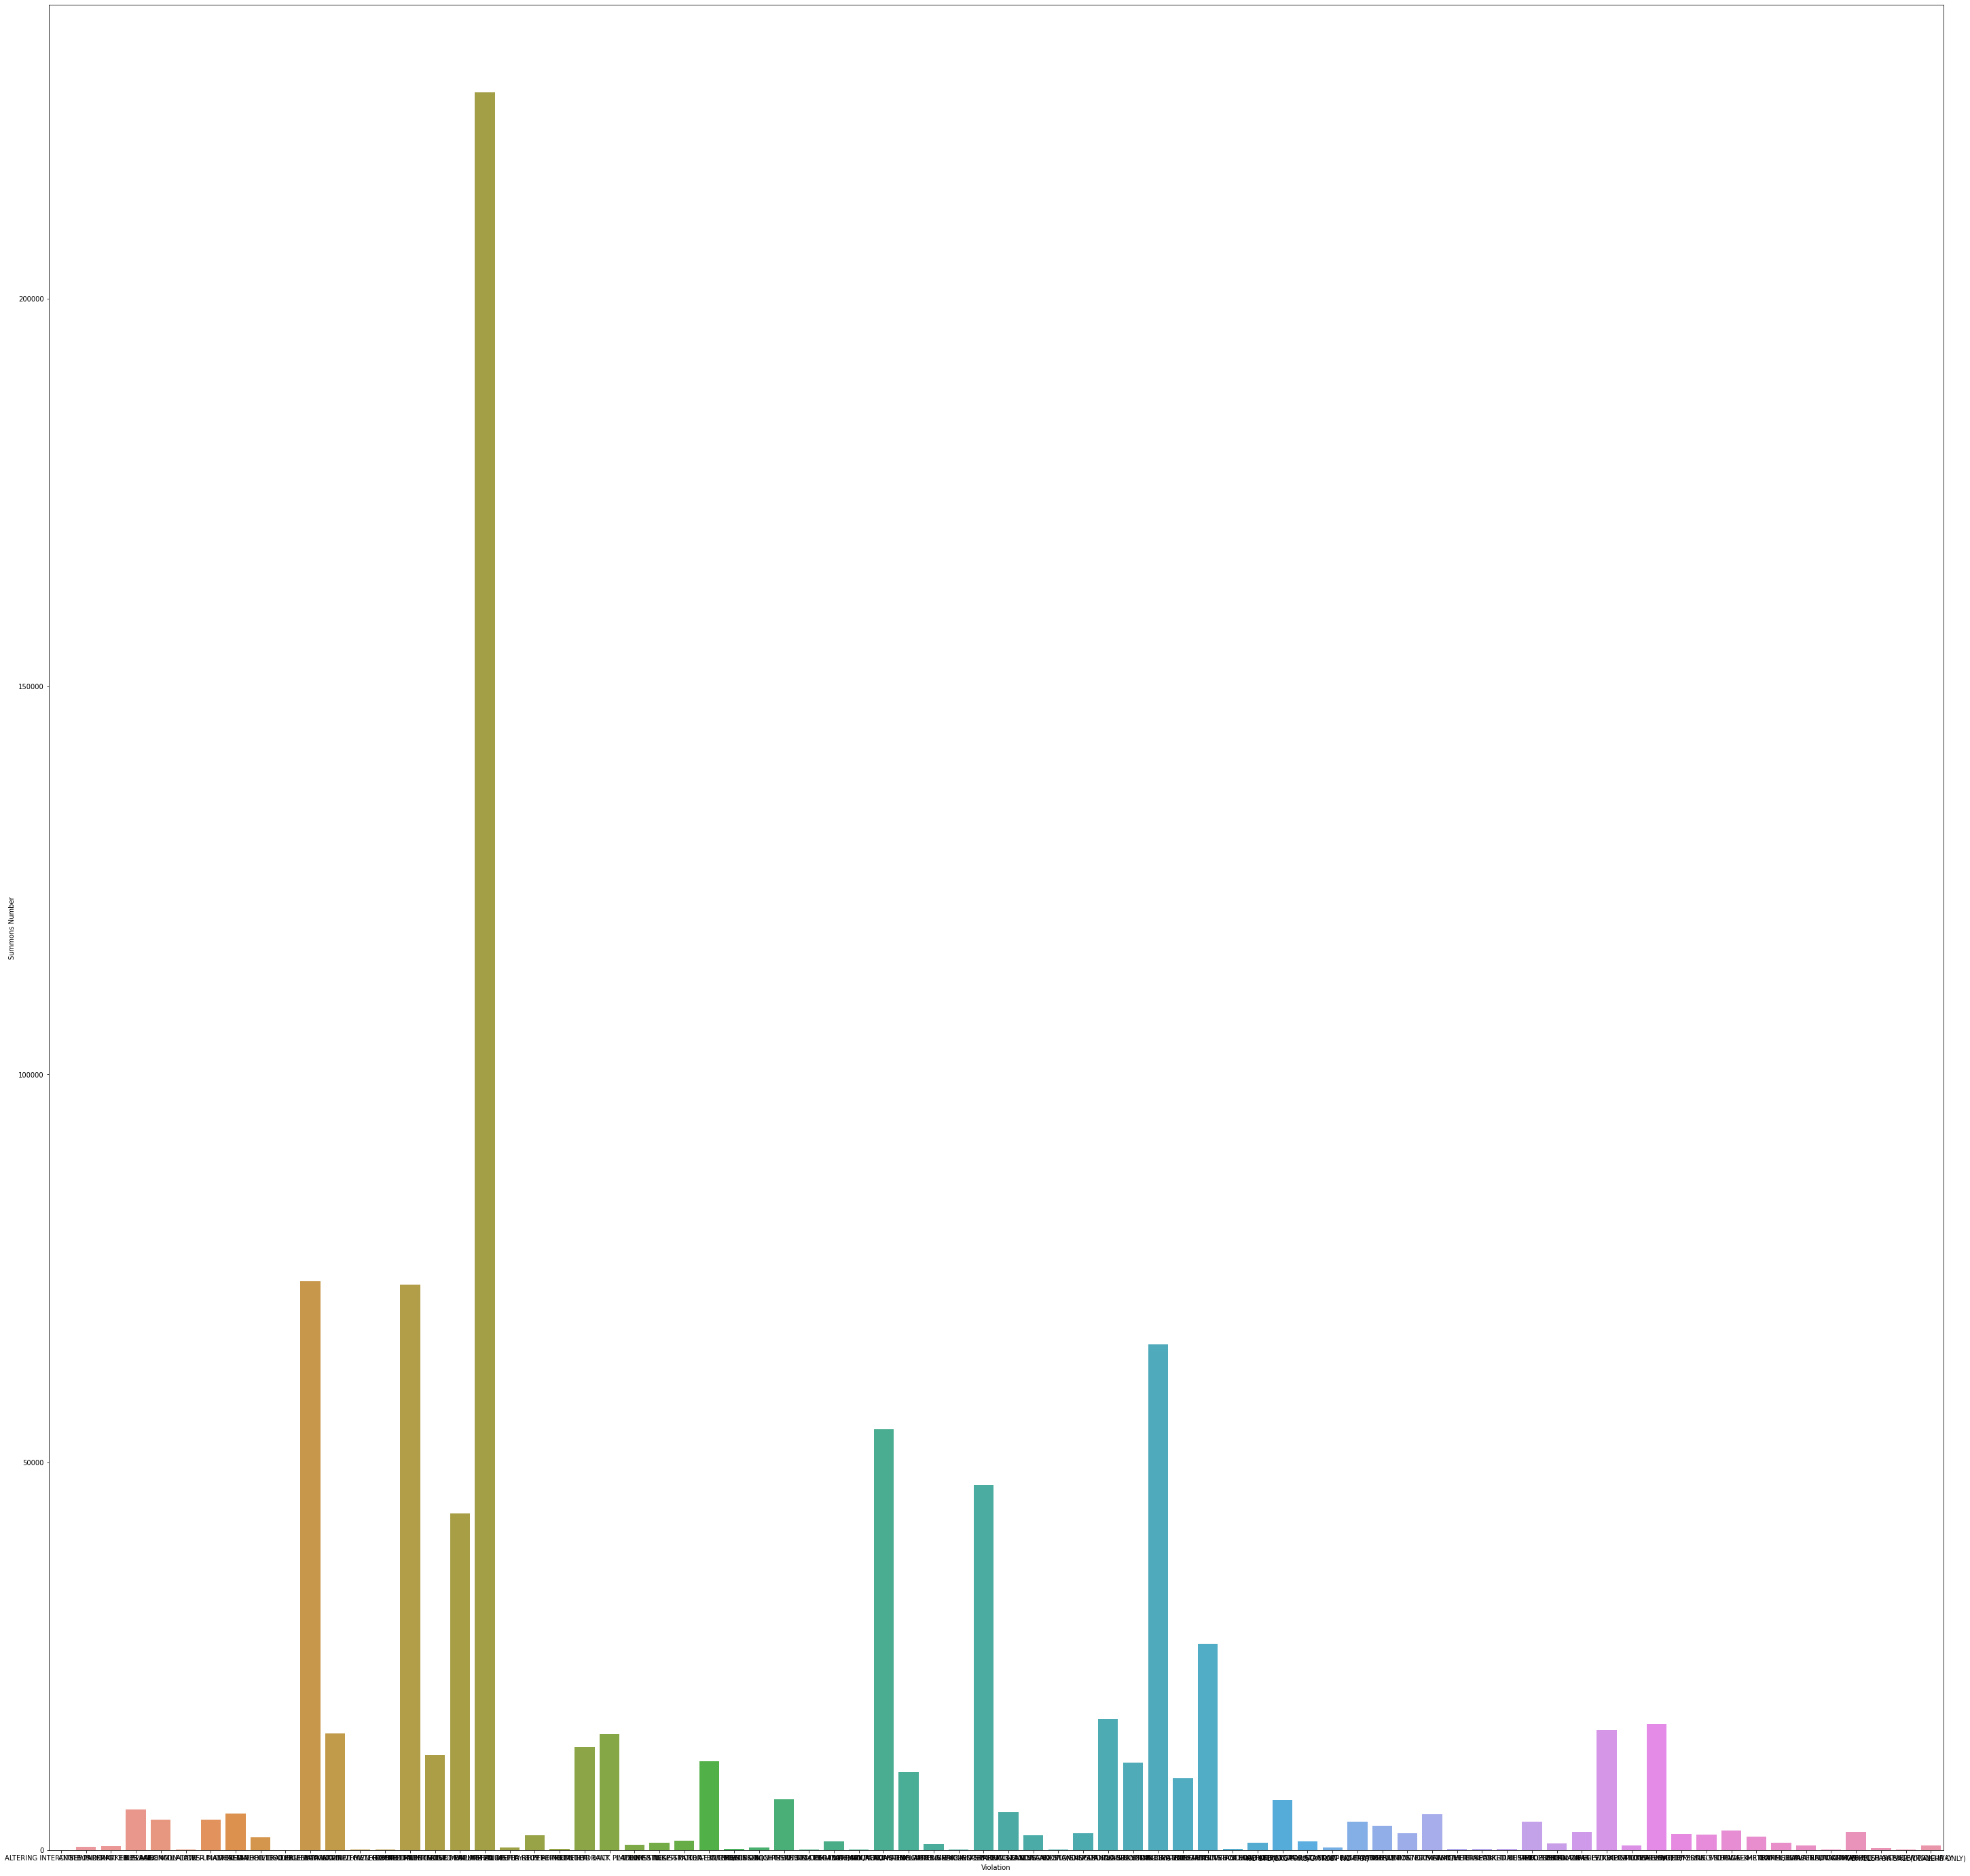

In [68]:
# Graph Granted appeals
granted = df_violation_grouped.loc[df_violation_grouped['Coded Violation Status'] == 'Granted']
plt.figure(figsize=(50, 50))
sns.barplot(x='Violation', y='Summons Number', data=granted) #, order=granted.sort_values('Summons Number').index.values ????

In [114]:
print(fp)

/Users/blake/Box/Project/Data/


In [120]:
granted = granted.drop('index', axis=1)
granted.sort_values(by='Pct', ascending=False)

,Violation,Coded Violation Status,Summons Number,Pct
0,ALTERING INTERCITY BUS PERMIT,Granted,23,100.00
248,VEHICLE FOR SALE(DEALERS ONLY),Granted,80,100.00
194,OVERNIGHT TRACTOR TRAILER PKG,Granted,182,100.00
110,NO OPERATOR NAM/ADD/PH DISPLAY,Granted,54,100.00
105,NIGHTTIME STD/ PKG IN A PARK,Granted,67,100.00
175,NO STOP/STANDNG EXCEPT PAS P/U,Granted,304,92.12
65,FAILURE TO DISPLAY BUS PERMIT,Granted,366,90.59
129,NO PARKING-TAXI STAND,Granted,4845,88.33
193,OTHER,Granted,183,85.92
116,NO PARKING-EXC. AUTH. VEHICLE,Granted,10031,83.19


In [116]:
# Graph granted in altair
g = alt.Chart(granted).mark_bar().encode(
    alt.X('Pct'),
    alt.Y('Violation', sort=alt.EncodingSortField(field="Pct", order="descending")),
).interactive().properties(
    title="Percentage of Appeals Granted By Violation",
    width=800
)

g
# g.save(fp + 'Graphs/granted.html')

alt.Chart(...)

In [90]:
# Graph denied appeals in altair
denied = df_violation_grouped.loc[df_violation_grouped['Coded Violation Status'] == 'Denied']
alt.Chart(denied).mark_bar(color='red').encode(
    alt.X('Pct'),
    alt.Y('Violation', sort=alt.EncodingSortField(field="Pct", order="descending")),
).interactive().properties(
    title="Percentage of Appeals Denied By Violation"
)

alt.Chart(...)

In [93]:
# Graph reduced appeals in altair
reduced = df_violation_grouped.loc[df_violation_grouped['Coded Violation Status'] == 'Reduced']
alt.Chart(reduced).mark_bar(color='purple').encode(
    alt.X('Pct'),
    alt.Y('Violation', sort=alt.EncodingSortField(field="Pct", order="descending")),
).interactive().properties(
    title="Percentage of Appeals Reduced By Violation"
)

alt.Chart(...)

In [95]:
df.corr()

NameError: name 'df' is not defined

In [35]:
# Get Descriptive Status by Coded Violation Status
coded_violation_status_list = list(set(df_violation_grouped['Coded Violation Status'].unique()))
for status in coded_violation_status_list:
    print(status)
    display(df_violation_grouped.loc[df_violation_grouped['Coded Violation Status'] == status].describe())
    print('\n\n')

Denied


,Summons Number,Pct
count,89.000000,89.000000
mean,9226.887640,32.396517
std,19597.331806,16.973632
min,1.000000,3.700000
25%,49.000000,16.670000
50%,575.000000,30.010000
75%,8629.000000,41.470000
max,118511.000000,72.730000





Other


,Summons Number,Pct
count,72.000000,72.000000
mean,292.236111,1.175833
std,621.777654,1.368896
min,1.000000,0.030000
25%,6.250000,0.377500
50%,25.000000,0.715000
75%,223.000000,1.335000
max,3800.000000,6.670000





Reduced


,Summons Number,Pct
count,86.000000,86.000000
mean,8765.034884,24.171395
std,25507.060524,20.295472
min,1.000000,0.280000
25%,18.750000,5.287500
50%,347.000000,19.915000
75%,4696.750000,37.767500
max,182897.000000,76.920000





Granted


,Summons Number,Pct
count,96.000000,96.00000
mean,8787.375000,47.43000
std,26936.902496,26.10976
min,1.000000,2.39000
25%,49.750000,24.33750
50%,797.500000,45.68000
75%,4643.000000,66.25750
max,226576.000000,100.00000


In [ ]:
df_violation_status_dropped.plot.scatter(x='Coded Violation Status', y='Summons Number')